In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split
from keras.regularizers import l1, l2

Sequential


In [81]:



def logistic_regression_analysis(X_train:pd.DataFrame, X_test:pd.DataFrame, y_train:list, y_test:list)->None:
  """_summary_

  Args:
      df (_type_): _description_
  """
  logistic_regression = LogisticRegression()

  logistic_regression.fit(X_train, y_train)

  y_predictions = logistic_regression.predict(X_test)
  
  accuracy = accuracy_score(y_test,y_predictions)
  
  print(classification_report(y_test,y_predictions))

  print(f"The Accuracy: {accuracy}")
  
def support_vector_machine(X_train:pd.DataFrame, X_test:pd.DataFrame, y_train:list, y_test:list):
  """_summary_

  Args:
      X_train (_type_): _description_
      X_test (_type_): _description_
      y_train (_type_): _description_
      y_test (_type_): _description_
  """
  
  svm_model = SVC()
  svm_model.fit(X_train, y_train)
  svm_pred = svm_model.predict(X_test)
  print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

def relu_model(X_train:pd.DataFrame, X_test:pd.DataFrame, y_train:list, y_test:list):
  """_summary_

  Args:
      X_train (pd.DataFrame): _description_
      X_test (pd.DataFrame): _description_
      y_train (list): _description_
      y_test (list): _description_
  """
  # Building the model
  model = Sequential()
  model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer
  model.add(Dense(15, activation='relu'))  # Second hidden layer with 15 neurons
  model.add(Dense(1, activation='sigmoid'))  # Output layer

  # Compile the model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  # Train the model
  history = model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1, validation_split=0.3)

  # Evaluate the model
  loss, accuracy = model.evaluate(X_test, y_test)
  print(f"Test Accuracy: {accuracy}")
  
  return history
def relu(X_train:pd.DataFrame, X_test:pd.DataFrame, y_train:list, y_test:list):
  """_summary_

  Args:
      X_train (pd.DataFrame): _description_
      X_test (pd.DataFrame): _description_
      y_train (list): _description_
      y_test (list): _description_
  """

  # Building the model
  model = Sequential()
  model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer
  model.add(Dense(15, activation='relu'))  # Second hidden layer with 15 neurons
  model.add(Dense(1, activation='sigmoid'))  # Output layer

  # Compile the model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  # Train the model
  model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

  # Evaluate the model
  loss, accuracy = model.evaluate(X_test, y_test)
  print(f"Test Accuracy: {accuracy}")
  
def compare_algorithms(X:pd.DataFrame, y:np.array, algorithms, cv=10, scoring='accuracy'):
    """
    Compare the accuracies of multiple machine learning algorithms using cross-validation.

    Parameters:
    - X: Features (input variables) as a numpy array or pandas DataFrame.
    - y: Target variable as a numpy array or pandas Series.
    - algorithms: List of machine learning algorithms to compare.
    - cv: Number of cross-validation folds (default=10).
    - scoring: Evaluation metric to use (default='accuracy').

    Returns:
    - accuracies: Dictionary containing the accuracies of each algorithm.
    """

    accuracies = {}
    standard_scaler = StandardScaler()
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
    X_train_standard_scaled, X_test_standard_scaled = standard_scaler.fit_transform(X_train), standard_scaler.fit_transform(X_test)
    for algorithm in algorithms:
      
      if type(algorithm).__name__ == "Sequential":
        # Building the model
        model = Sequential()
        model.add(Dense(10, input_dim=X_train_standard_scaled.shape[1], activation='relu'))  # First hidden layer
        model.add(Dense(15, activation='relu'))  # Second hidden layer with 15 neurons
        model.add(Dense(1, activation='sigmoid'))  # Output layer
        # Compile the model
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        # Train the model
        model.fit(X_train_standard_scaled, y_train, epochs=100, batch_size=10, verbose=1)
      else:
        algorithm.fit(X_train_standard_scaled, y_train)
        scores = cross_val_score(algorithm, X_test_standard_scaled, y_test, cv=cv, scoring=scoring)
        accuracies[type(algorithm).__name__] = np.mean(scores)

    return accuracies

def plot_algorithms(accuracies):
    """
    Plot a bar graph of accuracies for each algorithm.

    Parameters:
    - accuracies: Dictionary containing the accuracies of each algorithm.
    """

    algorithms = list(accuracies.keys())
    scores = list(accuracies.values())

    plt.figure(figsize=(10, 6))
    plt.barh(algorithms, scores, color='skyblue')
    plt.xlabel('Accuracy')
    plt.ylabel('Algorithm')
    plt.title('Accuracy of Machine Learning Algorithms')
    plt.xlim(0, 1)  # Set x-axis limits to range from 0 to 1
    plt.show()

In [58]:
training_df = pd.read_csv("Training.csv")

In [59]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2460 non-null   int64  
 1   Glucose                   2460 non-null   int64  
 2   BloodPressure             2460 non-null   int64  
 3   SkinThickness             2460 non-null   int64  
 4   Insulin                   2460 non-null   int64  
 5   BMI                       2460 non-null   float64
 6   DiabetesPedigreeFunction  2460 non-null   float64
 7   Age                       2460 non-null   int64  
 8   Outcome                   2460 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 173.1 KB


In [60]:
training_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,3.817480,121.602033,68.915041,20.531301,80.119919,31.990447,0.491440,32.821951,0.390244
std,3.296458,31.789270,19.082655,15.716901,116.765807,7.802569,0.363917,11.251208,0.487904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.100000,0.251750,24.000000,0.000000
50%,3.000000,117.000000,70.000000,23.000000,36.000000,32.100000,0.381000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,129.000000,36.500000,0.647000,39.000000,1.000000
max,17.000000,197.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [61]:
training_df.drop_duplicates()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
455,14,175,62,30,0,33.6,0.212,38,1
456,1,135,54,0,0,26.7,0.687,62,0
457,5,86,68,28,71,30.2,0.364,24,0
458,10,148,84,48,237,37.6,1.001,51,1


In [62]:
training_df.drop_duplicates(inplace=True)

In [63]:
total_outcomes = training_df["Outcome"].value_counts()

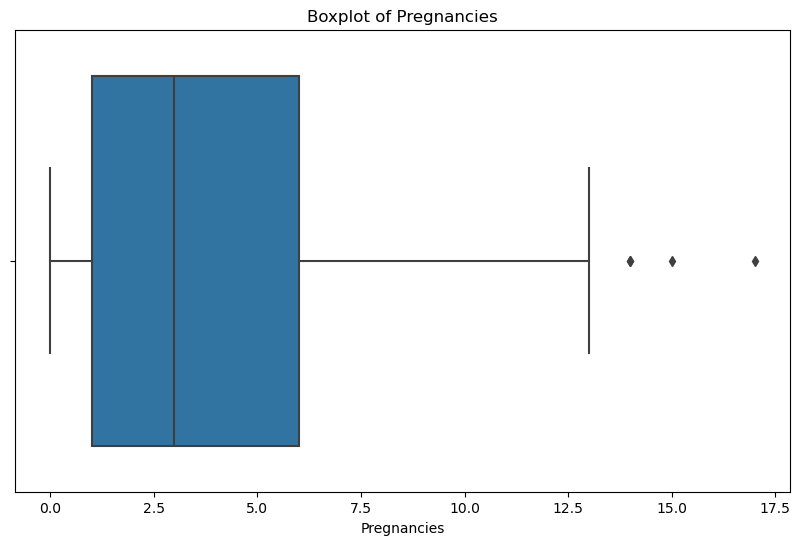

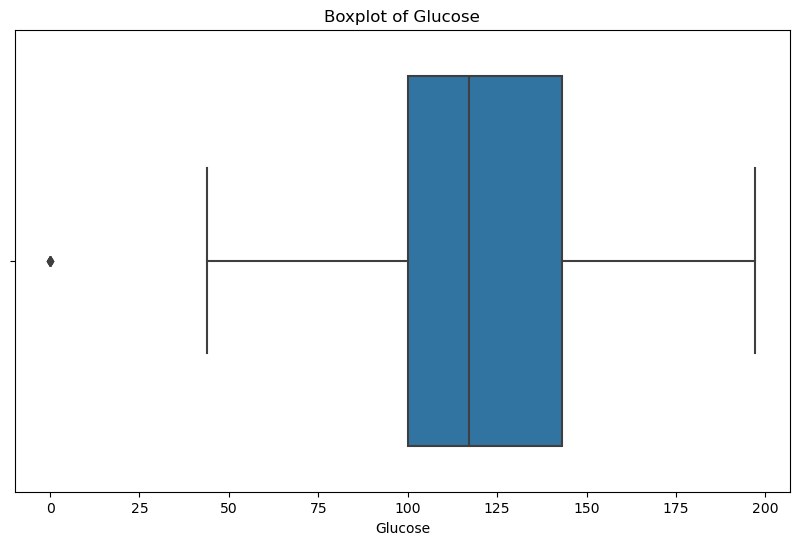

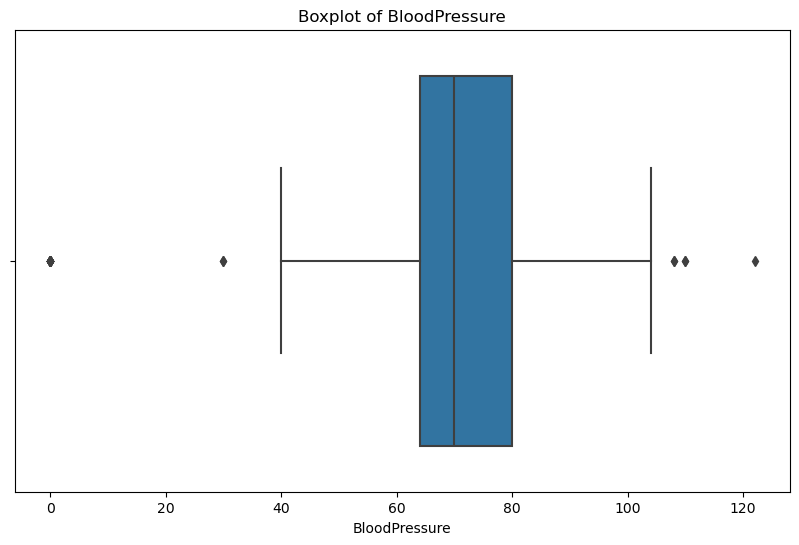

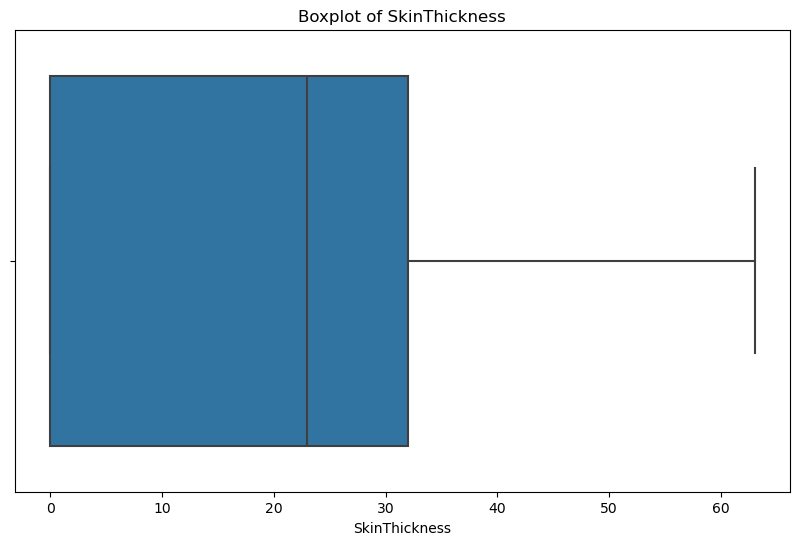

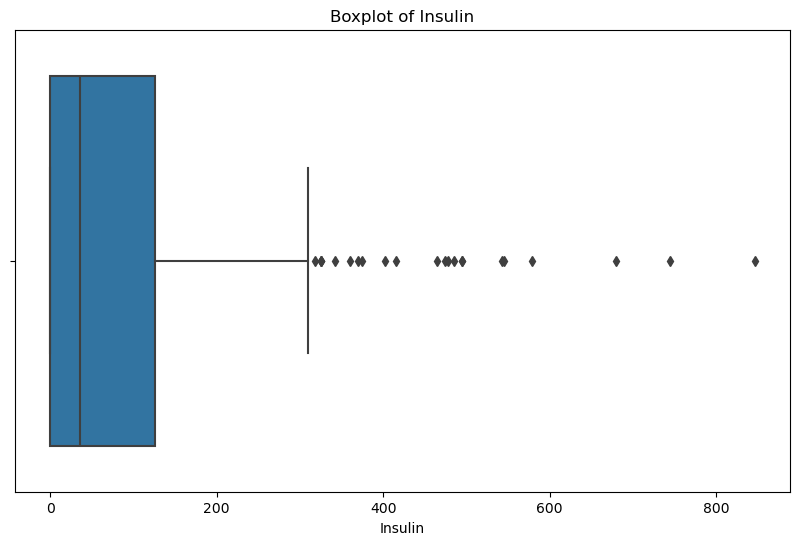

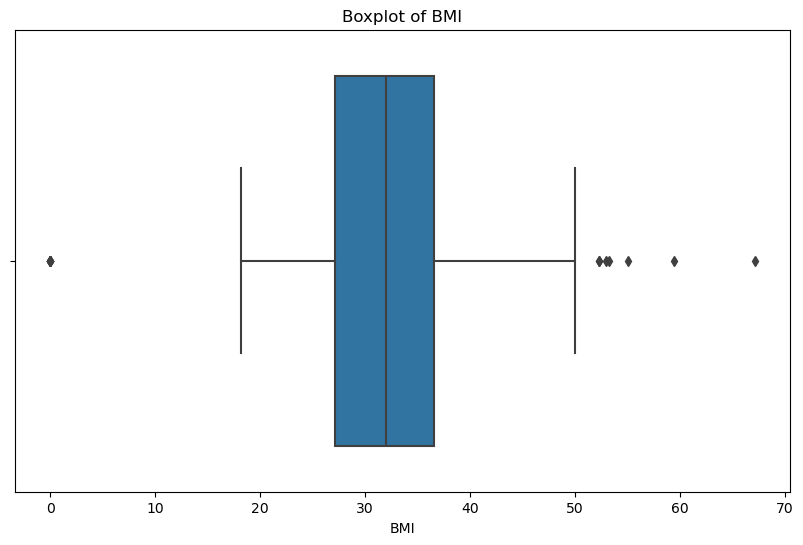

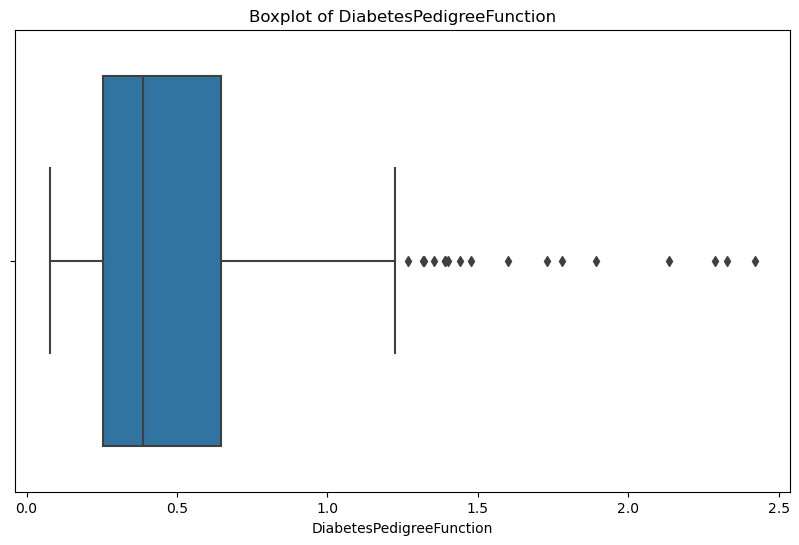

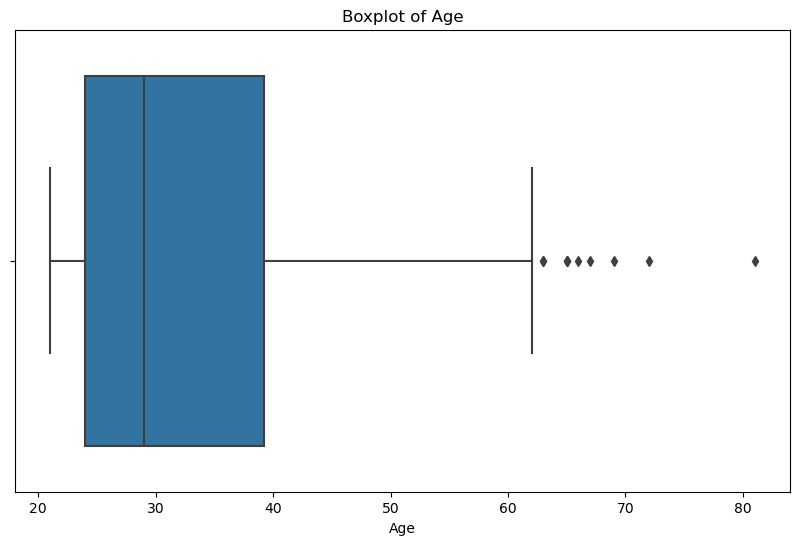

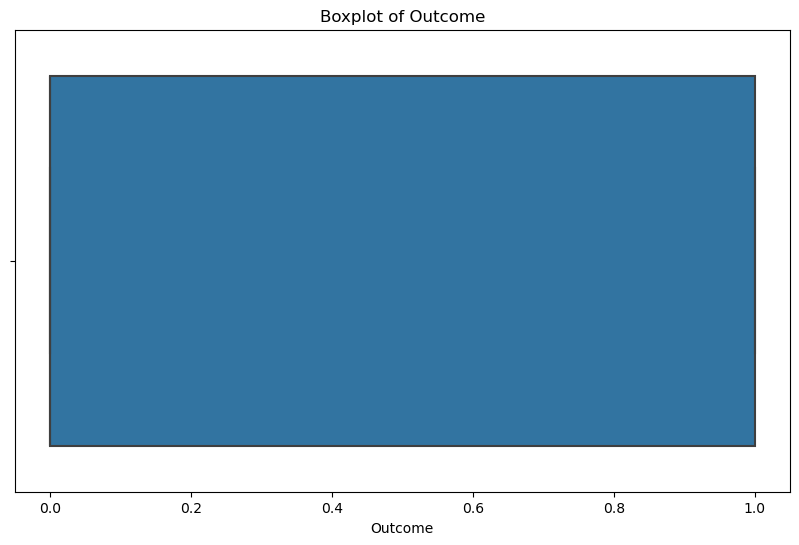

In [64]:
# Looking for outliers
for column in training_df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=training_df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

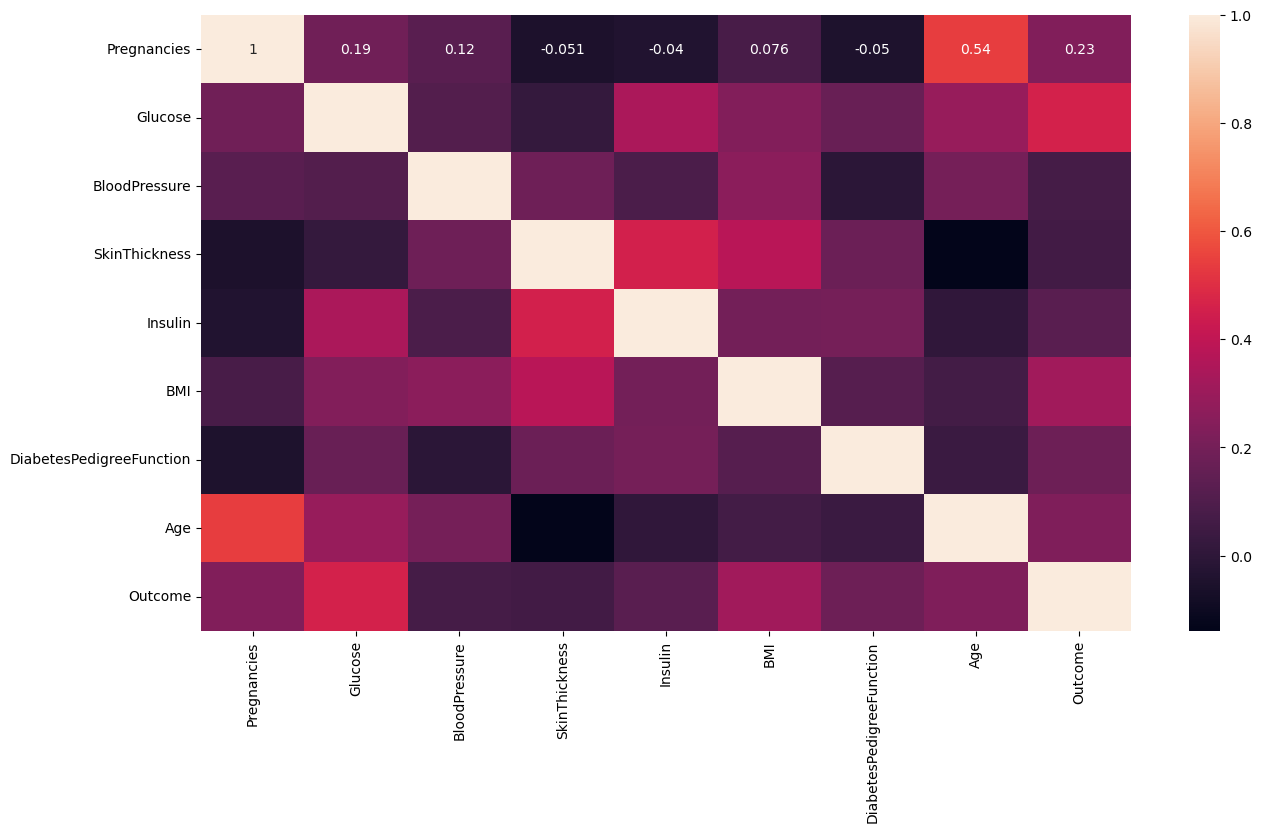

In [65]:
relations = training_df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(relations, annot=True)
plt.show()

<Axes: xlabel='Age', ylabel='BMI'>

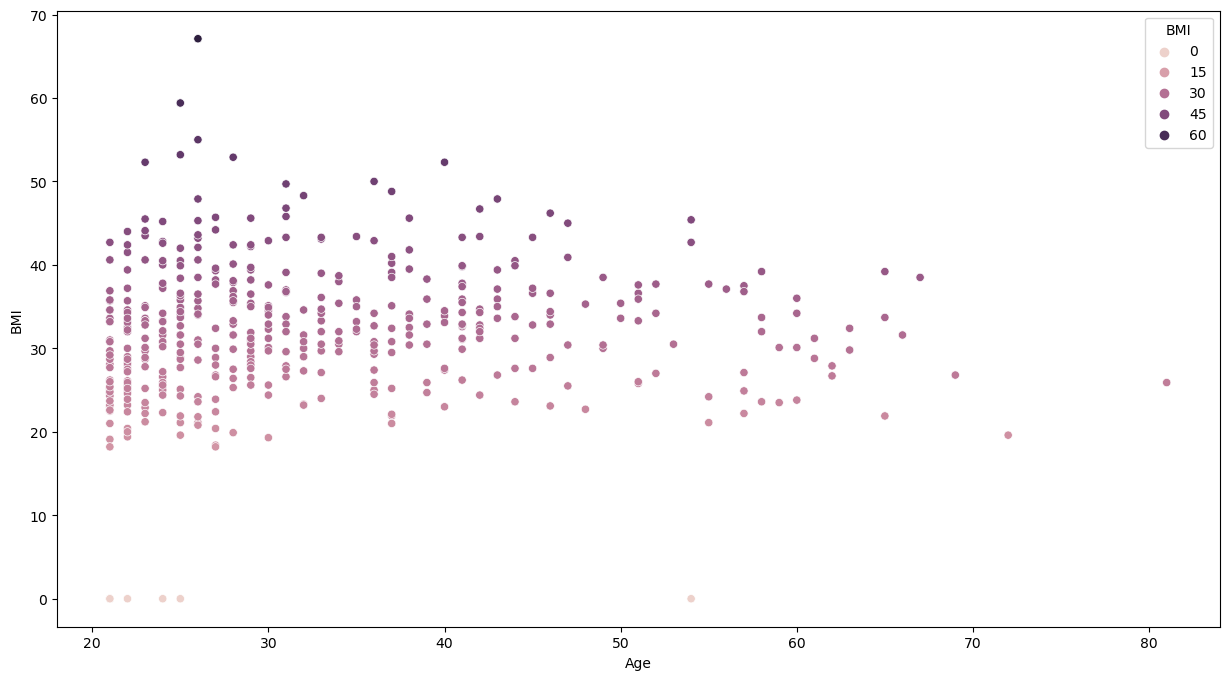

In [66]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="Age", y ="BMI", data = training_df, hue ="BMI")

<Axes: xlabel='Age', ylabel='SkinThickness'>

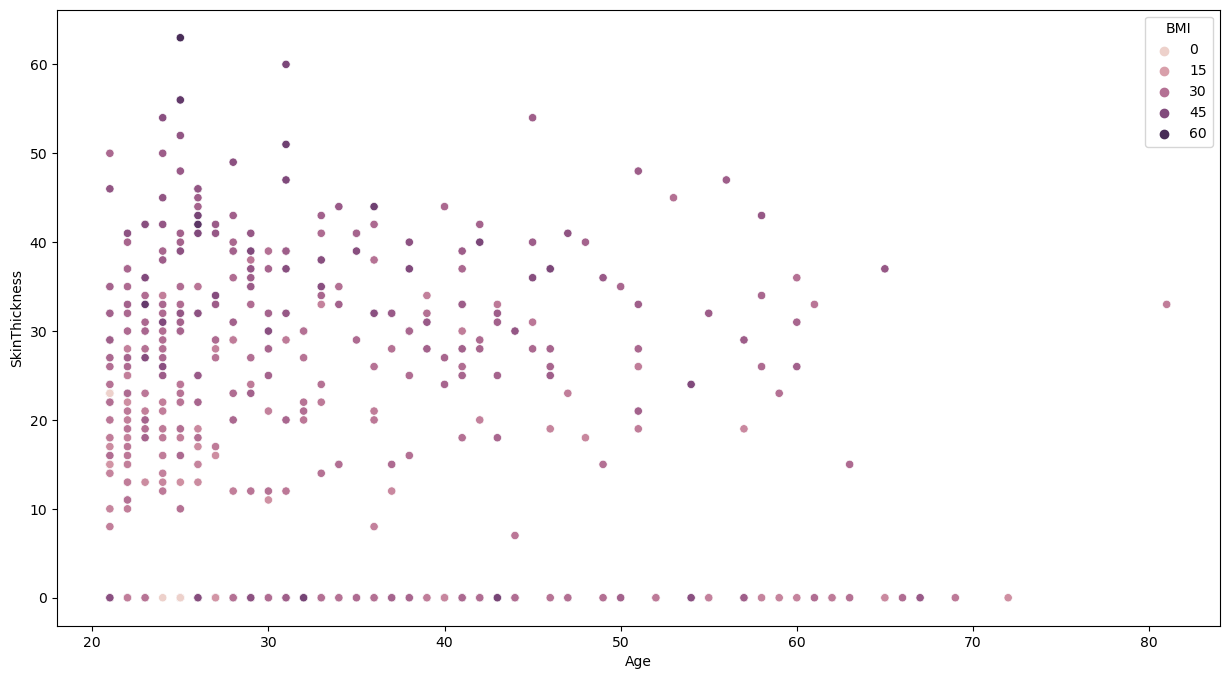

In [67]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="Age", y ="SkinThickness", data = training_df, hue ="BMI")

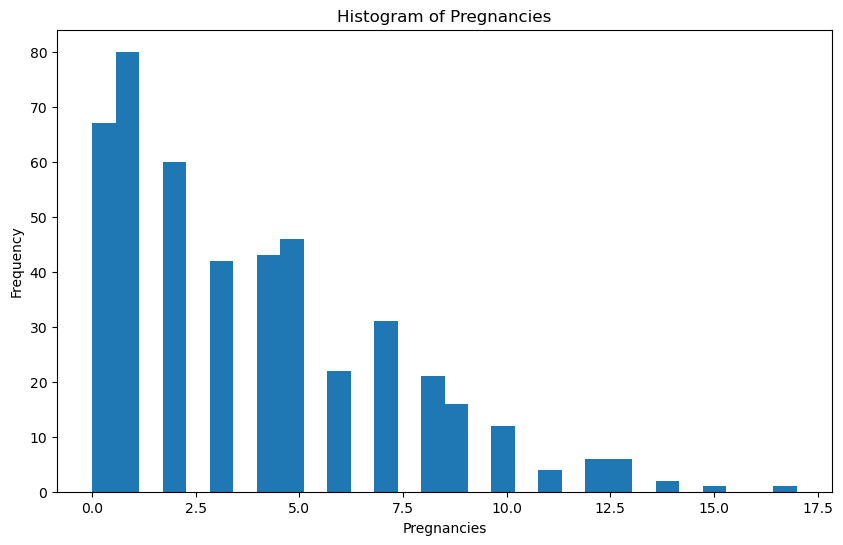

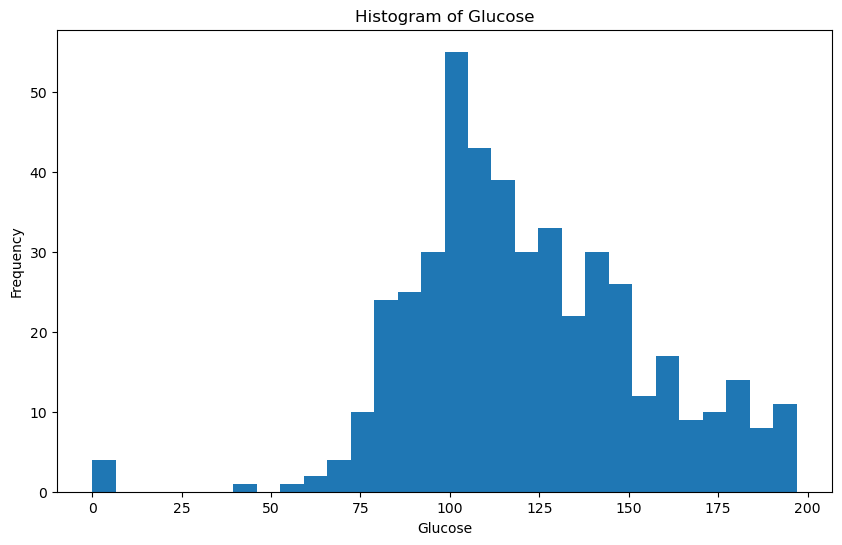

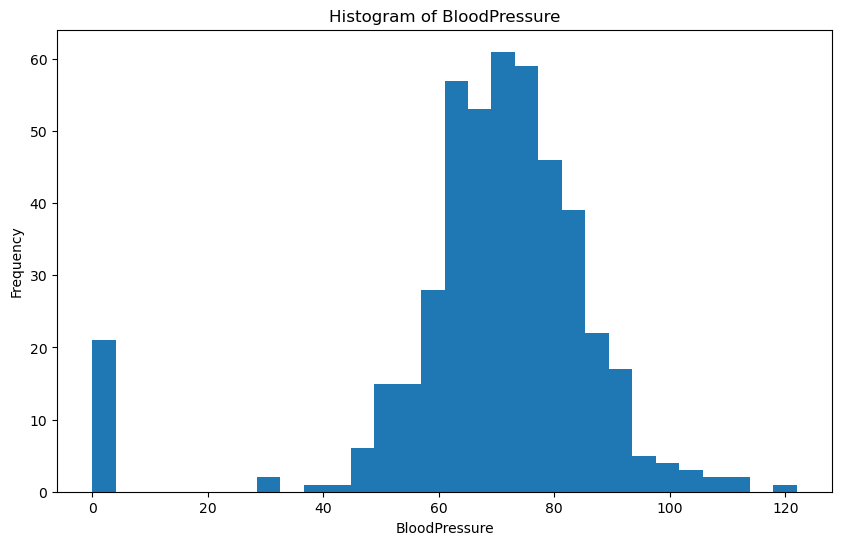

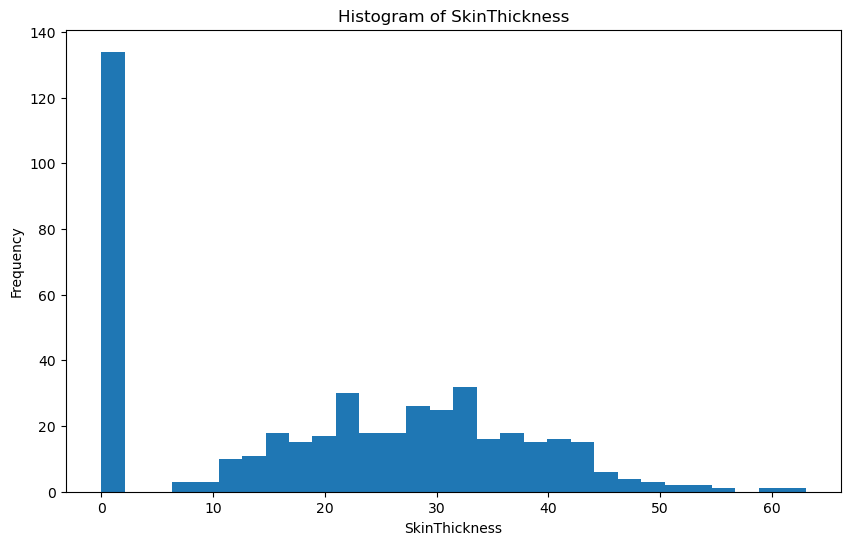

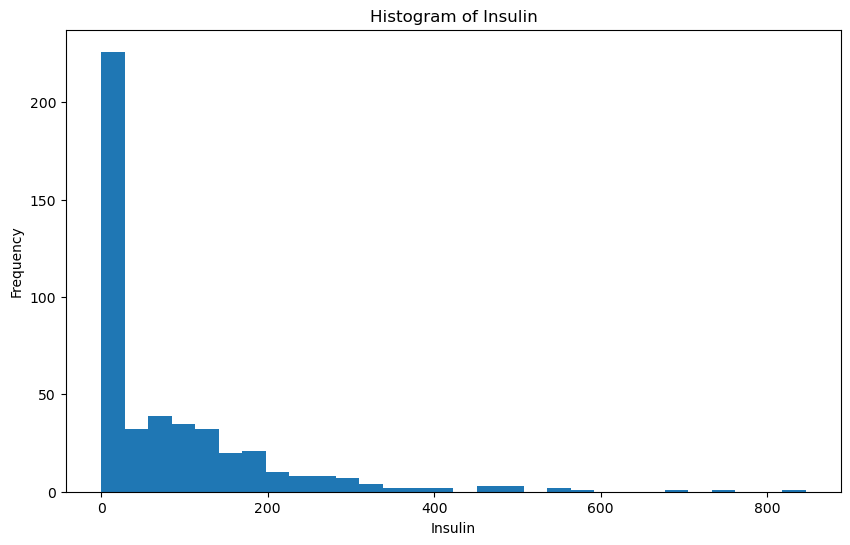

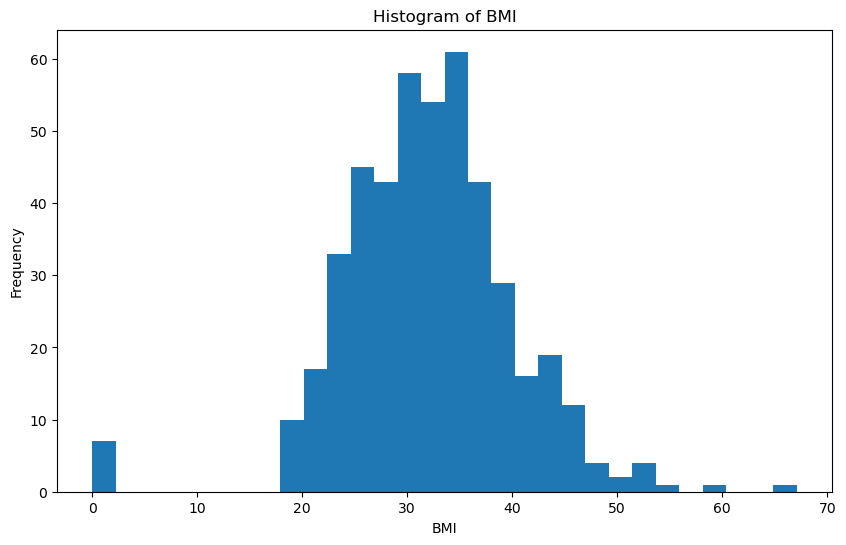

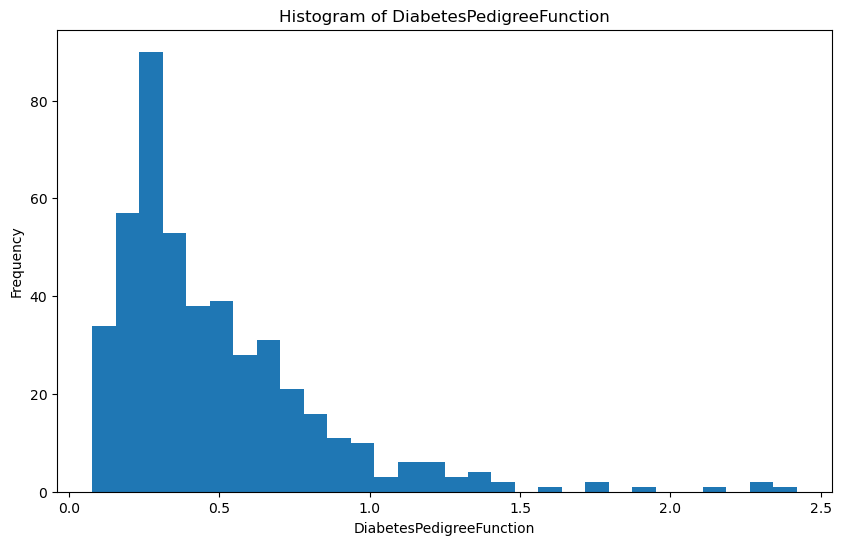

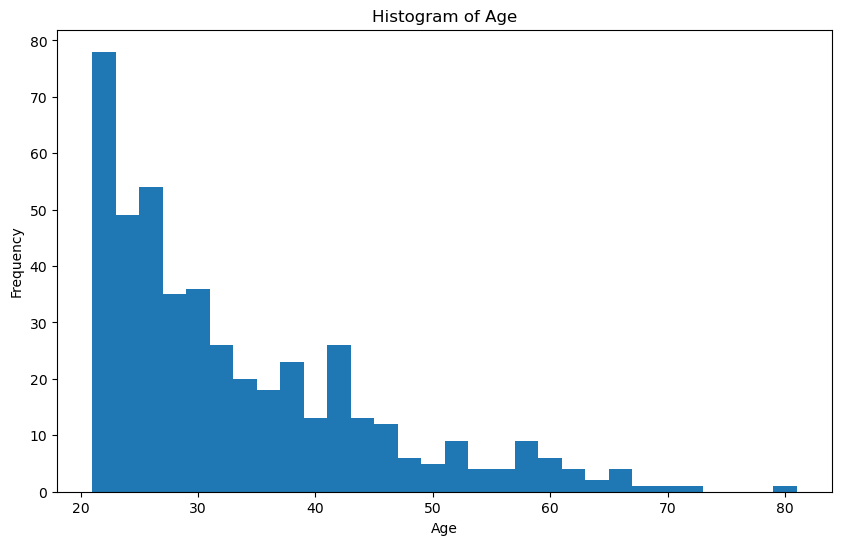

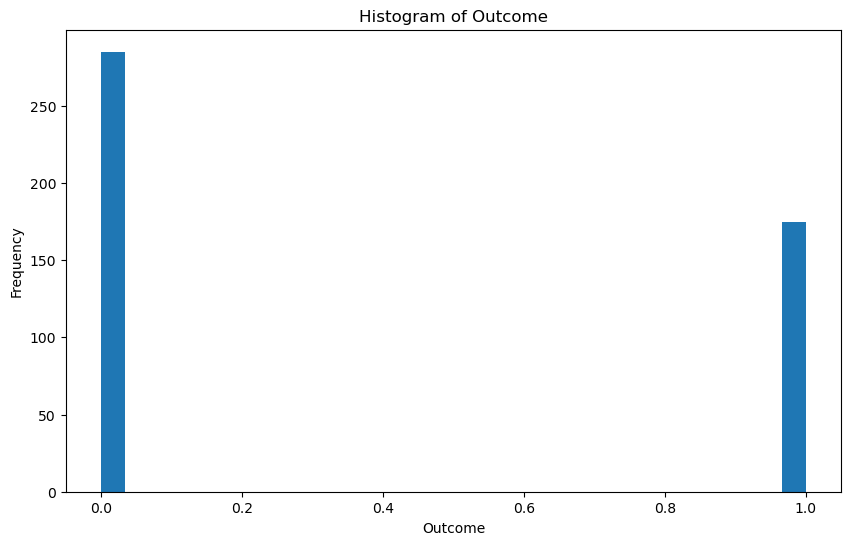

In [68]:
for column in training_df.columns:
    plt.figure(figsize=(10, 6))
    training_df[column].hist(bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

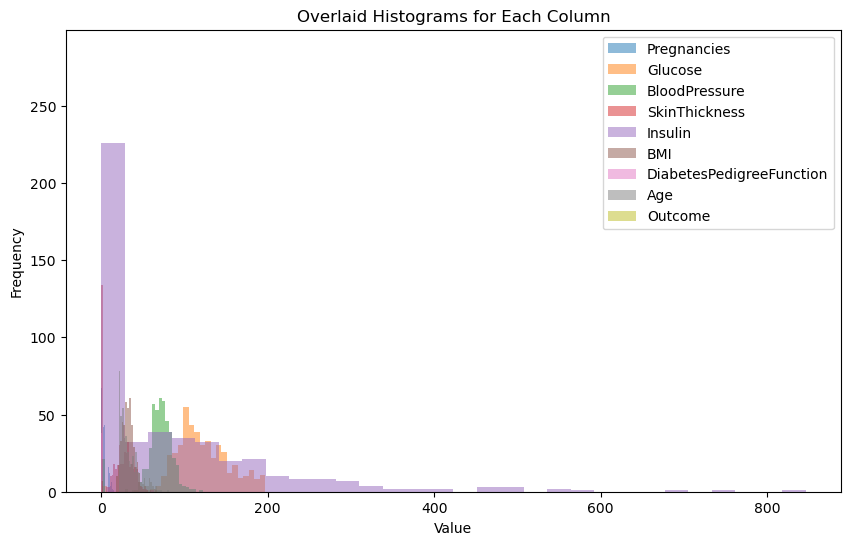

In [69]:
plt.figure(figsize=(10, 6))
for column in training_df.columns:
    plt.hist(training_df[column], bins=30, alpha=0.5, label=str(column))
plt.legend()
plt.title('Overlaid Histograms for Each Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

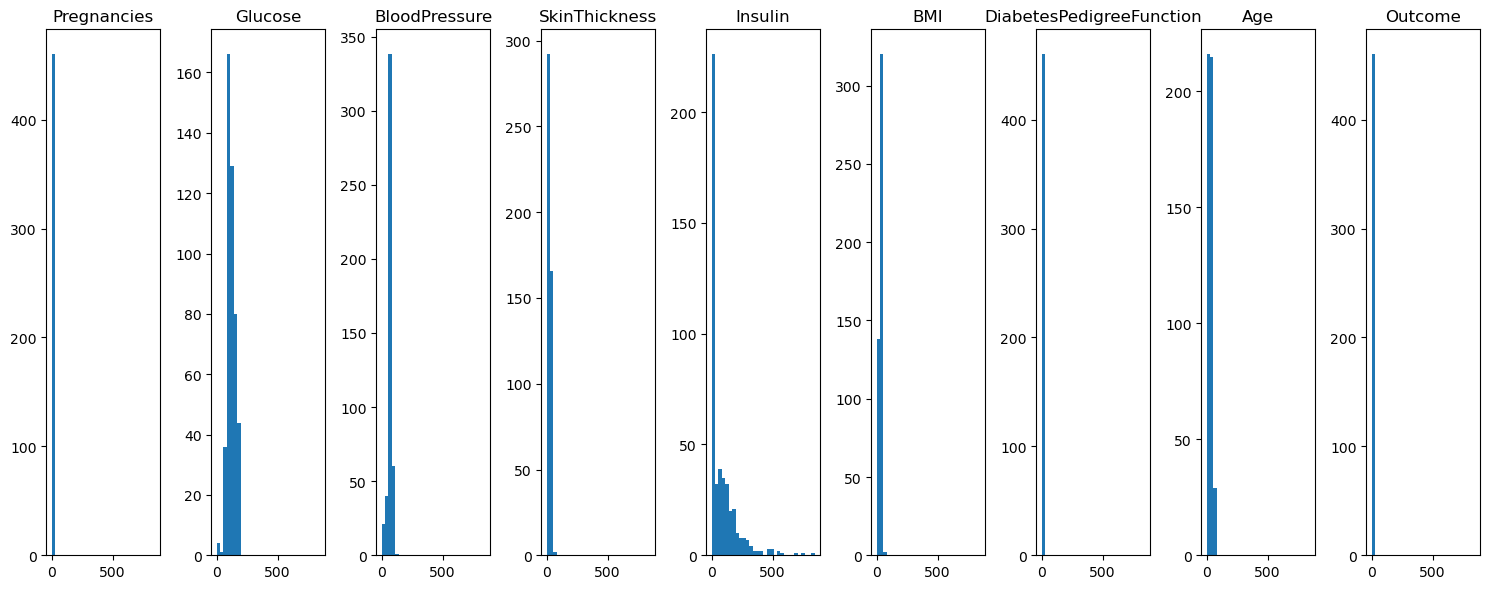

In [70]:
plt.figure(figsize=(15, 6))

# Number of bins
bins = 30

# Max and min values for consistent bin size
max_bin = training_df.max().max()
min_bin = training_df.min().min()

for i, column in enumerate(training_df.columns):
    plt.subplot(1, len(training_df.columns), i+1)
    plt.hist(training_df[column], bins=bins, range=(min_bin, max_bin))
    plt.title(column)

plt.tight_layout()
plt.show()

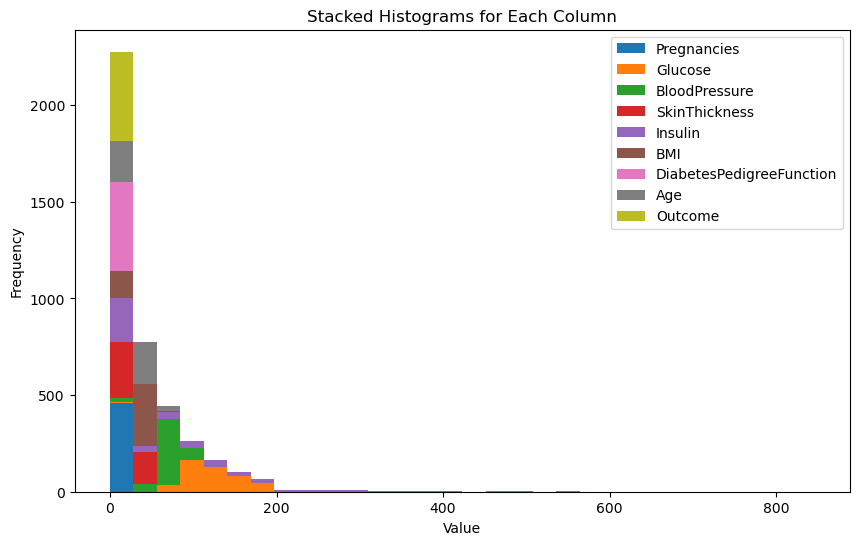

In [71]:
plt.figure(figsize=(10, 6))

# Creating a list of data for each column
data = [training_df[column] for column in training_df.columns]

plt.hist(data, bins=30, stacked=True)
plt.title('Stacked Histograms for Each Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(training_df.columns)
plt.show()

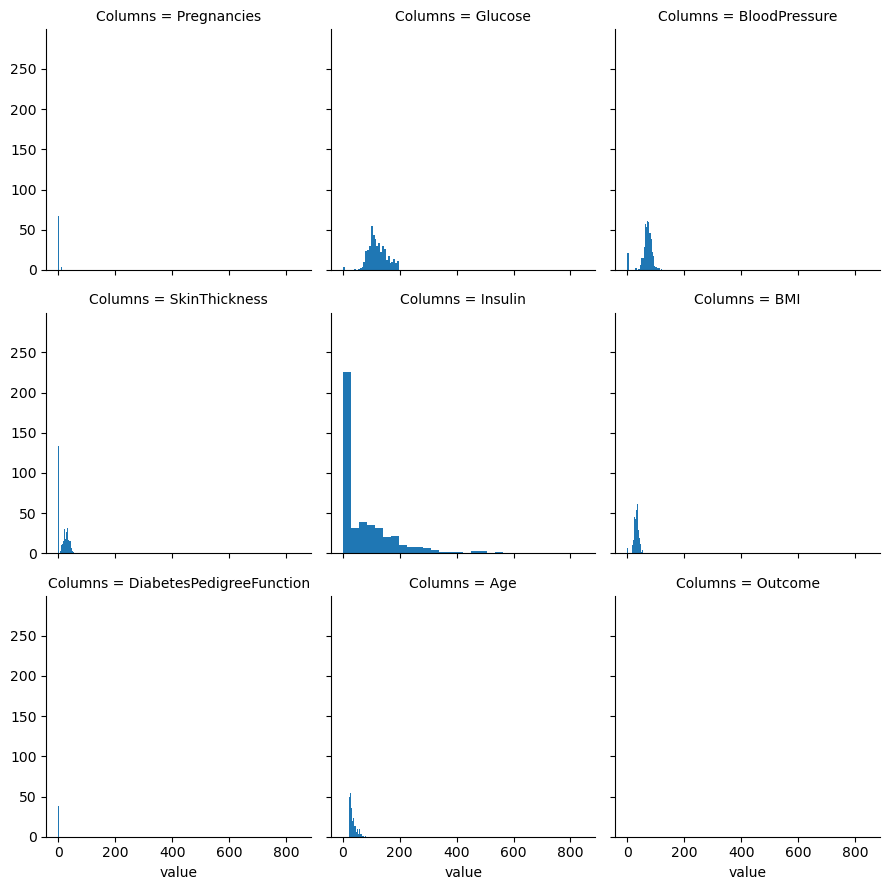

In [72]:
# Facet grid
g = sns.FacetGrid(pd.melt(training_df, var_name='Columns'), col='Columns', sharex=True, col_wrap=3)
g.map(plt.hist, 'value', bins=30)

plt.show()

In [73]:
X, y = training_df.drop("Outcome",axis =1), training_df["Outcome"]

standard_scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

X_train_standard_scaled, X_test_standard_scaled = standard_scaler.fit_transform(X_train), standard_scaler.fit_transform(X_test)

logistic_regression_analysis(X_train_standard_scaled, X_test_standard_scaled, y_train, y_test)

              precision    recall  f1-score   support

           0       0.73      0.92      0.81        78
           1       0.85      0.55      0.67        60

    accuracy                           0.76       138
   macro avg       0.79      0.74      0.74       138
weighted avg       0.78      0.76      0.75       138

The Accuracy: 0.7608695652173914


In [74]:
X, y = training_df.drop("Outcome",axis =1), training_df["Outcome"]

min_max_scaler =  MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

X_train_min_max_scaled, X_test_min_max_scaled = min_max_scaler.fit_transform(X_train), min_max_scaler.fit_transform(X_test)

logistic_regression_analysis(X_train_min_max_scaled, X_test_min_max_scaled, y_train, y_test)

              precision    recall  f1-score   support

           0       0.73      0.85      0.78        78
           1       0.74      0.58      0.65        60

    accuracy                           0.73       138
   macro avg       0.73      0.71      0.72       138
weighted avg       0.73      0.73      0.73       138

The Accuracy: 0.7318840579710145


In [75]:
X, y = training_df.drop("Outcome",axis =1), training_df["Outcome"]

min_max_scaler =  MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

X_train_min_max_scaled, X_test_min_max_scaled = min_max_scaler.fit_transform(X_train), min_max_scaler.fit_transform(X_test)

support_vector_machine(X_train_min_max_scaled, X_test_min_max_scaled, y_train, y_test)

SVM Accuracy: 0.7318840579710145


In [76]:
X, y = training_df.drop("Outcome",axis =1), training_df["Outcome"]

standard_scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

X_train_standard_scaled, X_test_standard_scaled = standard_scaler.fit_transform(X_train), standard_scaler.fit_transform(X_test)

support_vector_machine(X_train_standard_scaled, X_test_standard_scaled, y_train, y_test)

SVM Accuracy: 0.7246376811594203


In [77]:
# Assuming df is your DataFrame and 'column' is the column you're inspecting
Q1 = training_df['Insulin'].quantile(0.25)
Q3 = training_df['Insulin'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as those outside of Q1 - 1.5 * IQR and Q3 + 1.5 * IQR
outlier_condition = ((training_df['Insulin'] < (Q1 - 1.5 * IQR)) | (training_df['Insulin'] > (Q3 + 1.5 * IQR)))
training_df_no_outliers = training_df[~outlier_condition]

In [45]:
X, y = training_df_no_outliers.drop("Outcome",axis =1), training_df_no_outliers["Outcome"]

standard_scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

X_train_standard_scaled, X_test_standard_scaled = standard_scaler.fit_transform(X_train), standard_scaler.fit_transform(X_test)

logistic_regression_analysis(X_train_standard_scaled, X_test_standard_scaled, y_train, y_test)

              precision    recall  f1-score   support

           0       0.80      0.87      0.84        85
           1       0.72      0.62      0.67        47

    accuracy                           0.78       132
   macro avg       0.76      0.74      0.75       132
weighted avg       0.78      0.78      0.78       132

The Accuracy: 0.7803030303030303


In [46]:
X, y = training_df_no_outliers.drop("Outcome",axis =1), training_df_no_outliers["Outcome"]

min_max_scaler =  MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

X_train_min_max_scaled, X_test_min_max_scaled = min_max_scaler.fit_transform(X_train), min_max_scaler.fit_transform(X_test)

logistic_regression_analysis(X_train_min_max_scaled, X_test_min_max_scaled, y_train, y_test)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        85
           1       0.74      0.60      0.66        47

    accuracy                           0.78       132
   macro avg       0.77      0.74      0.75       132
weighted avg       0.78      0.78      0.77       132

The Accuracy: 0.7803030303030303


In [47]:
X, y = training_df_no_outliers.drop("Outcome",axis =1), training_df_no_outliers["Outcome"]


standard_scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

X_train_standard_scaled, X_test_standard_scaled = standard_scaler.fit_transform(X_train), standard_scaler.fit_transform(X_test)

support_vector_machine(X_train_standard_scaled, X_test_standard_scaled, y_train, y_test)

SVM Accuracy: 0.7651515151515151


In [48]:
X, y = training_df_no_outliers.drop("Outcome",axis =1), training_df_no_outliers["Outcome"]

min_max_scaler =  MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

X_train_min_max_scaled, X_test_min_max_scaled = min_max_scaler.fit_transform(X_train), min_max_scaler.fit_transform(X_test)

support_vector_machine(X_train_min_max_scaled, X_test_min_max_scaled, y_train, y_test)

SVM Accuracy: 0.75


In [50]:
X, y = training_df_no_outliers.drop("Outcome",axis =1), training_df_no_outliers["Outcome"]

min_max_scaler =  MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

X_train_min_max_scaled, X_test_min_max_scaled = min_max_scaler.fit_transform(X_train), min_max_scaler.fit_transform(X_test)

relu_model(X_train_min_max_scaled, X_test_min_max_scaled, y_train, y_test)

Epoch 1/100
22/22 [==============================] - 0s 5ms/step - loss: 0.6938 - accuracy: 0.4486 - val_loss: 0.6915 - val_accuracy: 0.4565
Epoch 2/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6887 - accuracy: 0.6121 - val_loss: 0.6848 - val_accuracy: 0.6630
Epoch 3/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6844 - accuracy: 0.6121 - val_loss: 0.6792 - val_accuracy: 0.6630
Epoch 4/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6809 - accuracy: 0.6168 - val_loss: 0.6755 - val_accuracy: 0.6630
Epoch 5/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6782 - accuracy: 0.6121 - val_loss: 0.6717 - val_accuracy: 0.6630
Epoch 6/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6751 - accuracy: 0.6121 - val_loss: 0.6681 - val_accuracy: 0.6630
Epoch 7/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6727 - accuracy: 0.6121 - val_loss: 0.6655 - val_accuracy: 0.6522
Epoch 8/100
2

Epoch 1/100
22/22 [==============================] - 0s 4ms/step - loss: 0.7450 - accuracy: 0.5935 - val_loss: 0.6687 - val_accuracy: 0.6522
Epoch 2/100
22/22 [==============================] - 0s 1ms/step - loss: 0.7096 - accuracy: 0.6075 - val_loss: 0.6550 - val_accuracy: 0.6848
Epoch 3/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6892 - accuracy: 0.6168 - val_loss: 0.6444 - val_accuracy: 0.6848
Epoch 4/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6728 - accuracy: 0.6449 - val_loss: 0.6370 - val_accuracy: 0.7391
Epoch 5/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6586 - accuracy: 0.6729 - val_loss: 0.6282 - val_accuracy: 0.7391
Epoch 6/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6454 - accuracy: 0.6776 - val_loss: 0.6175 - val_accuracy: 0.7391
Epoch 7/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6330 - accuracy: 0.6776 - val_loss: 0.6060 - val_accuracy: 0.7391
Epoch 8/100
2

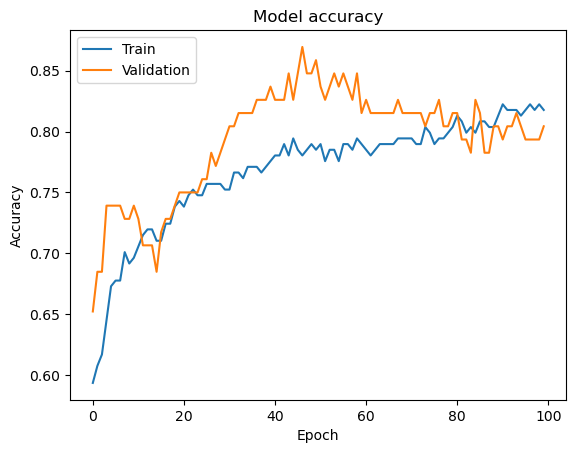

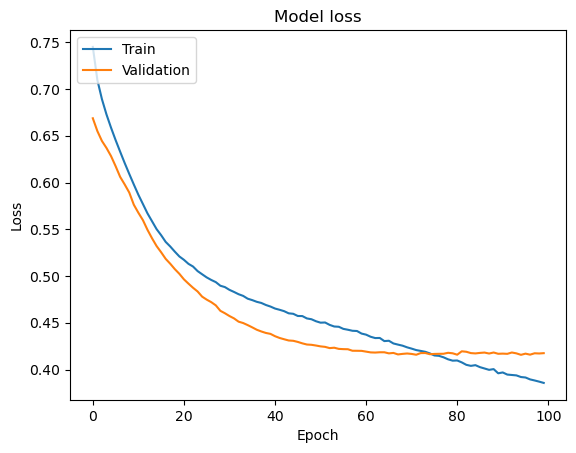

In [52]:
X, y = training_df_no_outliers.drop("Outcome",axis =1), training_df_no_outliers["Outcome"]


standard_scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

X_train_standard_scaled, X_test_standard_scaled = standard_scaler.fit_transform(X_train), standard_scaler.fit_transform(X_test)

history = relu_model(X_train_standard_scaled, X_test_standard_scaled, y_train, y_test)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [54]:
X, y = training_df_no_outliers.drop("Outcome",axis =1), training_df_no_outliers["Outcome"]

min_max_scaler =  MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

X_train_min_max_scaled, X_test_min_max_scaled = min_max_scaler.fit_transform(X_train), min_max_scaler.fit_transform(X_test)

relu(X_train_min_max_scaled, X_test_min_max_scaled, y_train, y_test)

Epoch 1/100
31/31 [==============================] - 0s 615us/step - loss: 0.6850 - accuracy: 0.6471
Epoch 2/100
31/31 [==============================] - 0s 517us/step - loss: 0.6739 - accuracy: 0.6242
Epoch 3/100
31/31 [==============================] - 0s 886us/step - loss: 0.6685 - accuracy: 0.6242
Epoch 4/100
31/31 [==============================] - 0s 900us/step - loss: 0.6651 - accuracy: 0.6242
Epoch 5/100
31/31 [==============================] - 0s 568us/step - loss: 0.6622 - accuracy: 0.6242
Epoch 6/100
31/31 [==============================] - 0s 621us/step - loss: 0.6599 - accuracy: 0.6242
Epoch 7/100
31/31 [==============================] - 0s 556us/step - loss: 0.6579 - accuracy: 0.6242
Epoch 8/100
31/31 [==============================] - 0s 500us/step - loss: 0.6549 - accuracy: 0.6242
Epoch 9/100
31/31 [==============================] - 0s 510us/step - loss: 0.6523 - accuracy: 0.6242
Epoch 10/100
31/31 [==============================] - 0s 508us/step - loss: 0.6498 - accura

In [55]:
X, y = training_df_no_outliers.drop("Outcome",axis =1), training_df_no_outliers["Outcome"]

standard_scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

X_train_standard_scaled, X_test_standard_scaled = standard_scaler.fit_transform(X_train), standard_scaler.fit_transform(X_test)

relu(X_train_standard_scaled, X_test_standard_scaled, y_train, y_test)

Epoch 1/100
31/31 [==============================] - 0s 631us/step - loss: 0.6648 - accuracy: 0.6176
Epoch 2/100
31/31 [==============================] - 0s 544us/step - loss: 0.6387 - accuracy: 0.6275
Epoch 3/100
31/31 [==============================] - 0s 574us/step - loss: 0.6199 - accuracy: 0.6275
Epoch 4/100
31/31 [==============================] - 0s 602us/step - loss: 0.6030 - accuracy: 0.6275
Epoch 5/100
31/31 [==============================] - 0s 601us/step - loss: 0.5882 - accuracy: 0.6340
Epoch 6/100
31/31 [==============================] - 0s 713us/step - loss: 0.5760 - accuracy: 0.6471
Epoch 7/100
31/31 [==============================] - 0s 576us/step - loss: 0.5643 - accuracy: 0.6667
Epoch 8/100
31/31 [==============================] - 0s 642us/step - loss: 0.5535 - accuracy: 0.6961
Epoch 9/100
31/31 [==============================] - 0s 680us/step - loss: 0.5461 - accuracy: 0.7255
Epoch 10/100
31/31 [==============================] - 0s 749us/step - loss: 0.5372 - accura

# Testing Data Frame

In [78]:
testing_df = pd.read_csv("Testing.csv")

testing_df.drop_duplicates(inplace=True)

# Assuming df is your DataFrame and 'column' is the column you're inspecting
Q1 = testing_df['Insulin'].quantile(0.25)
Q3 = testing_df['Insulin'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as those outside of Q1 - 1.5 * IQR and Q3 + 1.5 * IQR
outlier_condition = ((testing_df['Insulin'] < (Q1 - 1.5 * IQR)) | (testing_df['Insulin'] > (Q3 + 1.5 * IQR)))
testing_df_no_outliers = testing_df[~outlier_condition]

Epoch 1/100
15/15 [==============================] - 0s 8ms/step - loss: 0.6975 - accuracy: 0.6528 - val_loss: 0.5615 - val_accuracy: 0.7581
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.6528 - val_loss: 0.5523 - val_accuracy: 0.7581
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.6667 - val_loss: 0.5418 - val_accuracy: 0.7581
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6527 - accuracy: 0.6667 - val_loss: 0.5322 - val_accuracy: 0.7581
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6425 - accuracy: 0.6667 - val_loss: 0.5251 - val_accuracy: 0.7581
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6324 - accuracy: 0.6875 - val_loss: 0.5175 - val_accuracy: 0.7581
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6234 - accuracy: 0.6875 - val_loss: 0.5054 - val_accuracy: 0.7581
Epoch 8/100
1

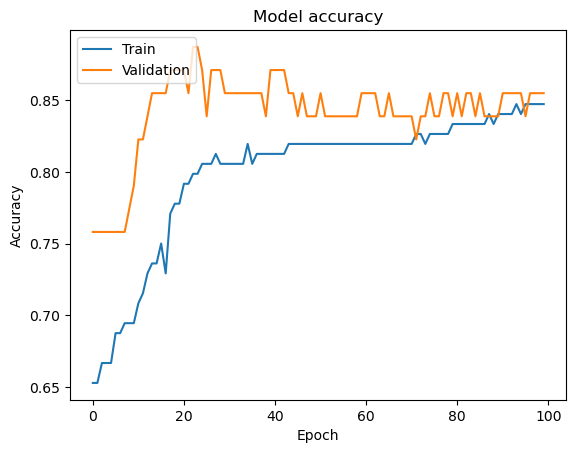

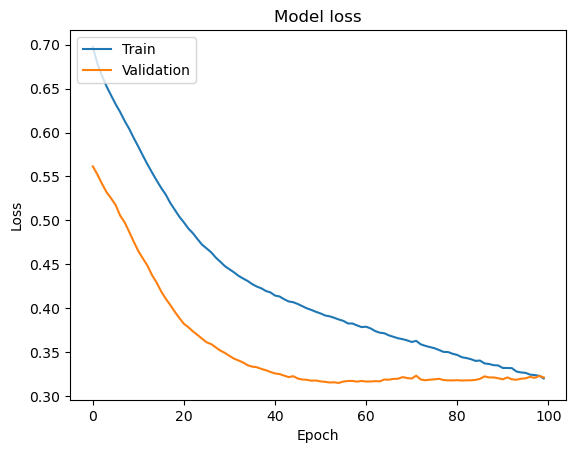

In [79]:
X, y = testing_df_no_outliers.drop("Outcome",axis =1), testing_df_no_outliers["Outcome"]

standard_scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

X_train_standard_scaled, X_test_standard_scaled = standard_scaler.fit_transform(X_train), standard_scaler.fit_transform(X_test)

history = relu_model(X_train_standard_scaled, X_test_standard_scaled, y_train, y_test)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [ ]:

LR = LogisticRegression()
svc = SVC()
neural_network = Sequential()
algorithms = [LR, svc, neural_network]